# Data Exploration

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
pay=pd.read_csv('paygap.csv')
speed=pd.read_csv('speeddating.csv')
oscar=pd.read_csv('oscars.csv', encoding = "ISO-8859-1")

In [16]:
oscar.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [17]:
pay.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [18]:
speed.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


could look at religion, race, attractiveness. can also look at correlation between interests (shared interests). dataset includes answers to questionaires about the following:
- (`_o`) what do i think my partner believes
- (`_important`) what do i look for in a partner
- (`_partner`) what do i rate my partner
- no added tag --> what do i think of myself

In [35]:
# delete columns which just show the distribution buckets
clean_speed = speed[speed.columns.drop(list(speed.filter(regex='d_')))]

In [36]:
clean_speed.columns

Index(['has_null', 'wave', 'gender', 'age', 'age_o', 'race', 'race_o',
       'samerace', 'importance_same_race', 'importance_same_religion', 'field',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'attractive_important',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'attractive', 'sincere', 'intelligence', 'funny',
       'ambition', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'interests_correlate', 'like', 'guess_prob_liked',
       'met', 'decision', 'decision_o', 'match'],
      dtype='object')

In [33]:
clean_speed

,has_null,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,...,9.0,8.0,1.0,0.16,7.0,NaN,1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',2.0,4.0,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,b'European/Caucasian-American',b'Latino/Hispanic American',b'0',1.0,1.0,...,10.0,7.0,3.0,0.64,2.0,5.0,0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,b'European/Caucasian-American',b'Other',b'0',1.0,1.0,...,10.0,7.0,3.0,0.71,4.0,4.0,0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,b'European/Caucasian-American',b'Latino/Hispanic American',b'0',1.0,1.0,...,10.0,7.0,3.0,-0.46,6.0,5.0,0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',1.0,1.0,...,10.0,7.0,3.0,0.62,5.0,5.0,0.0,b'0',b'1',b'0'


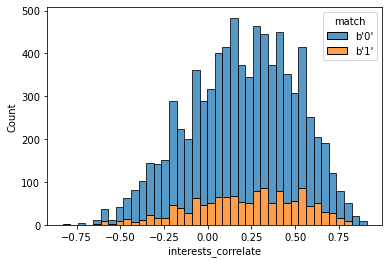

In [55]:
sns.histplot(x='interests_correlate', hue="match", data=clean_speed, multiple="stack")
plt.show()

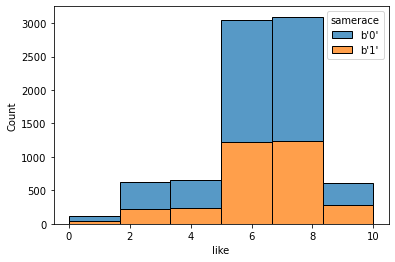

In [57]:
sns.histplot(x='like', hue='samerace', data=clean_speed, multiple="stack", bins=6)
plt.show()

In [72]:
numbers = clean_speed.select_dtypes(include=np.number)

In [84]:
corr = numbers.corr()

In [93]:
numbers.columns

Index(['wave', 'age', 'age_o', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'attractive', 'sincere',
       'intelligence', 'funny', 'ambition', 'attractive_partner',
       'sincere_partner', 'intelligence_partner', 'funny_partner',
       'ambition_partner', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'interests_correlate', 'like', 'guess_prob_liked', 'met'],
      dtype='object')

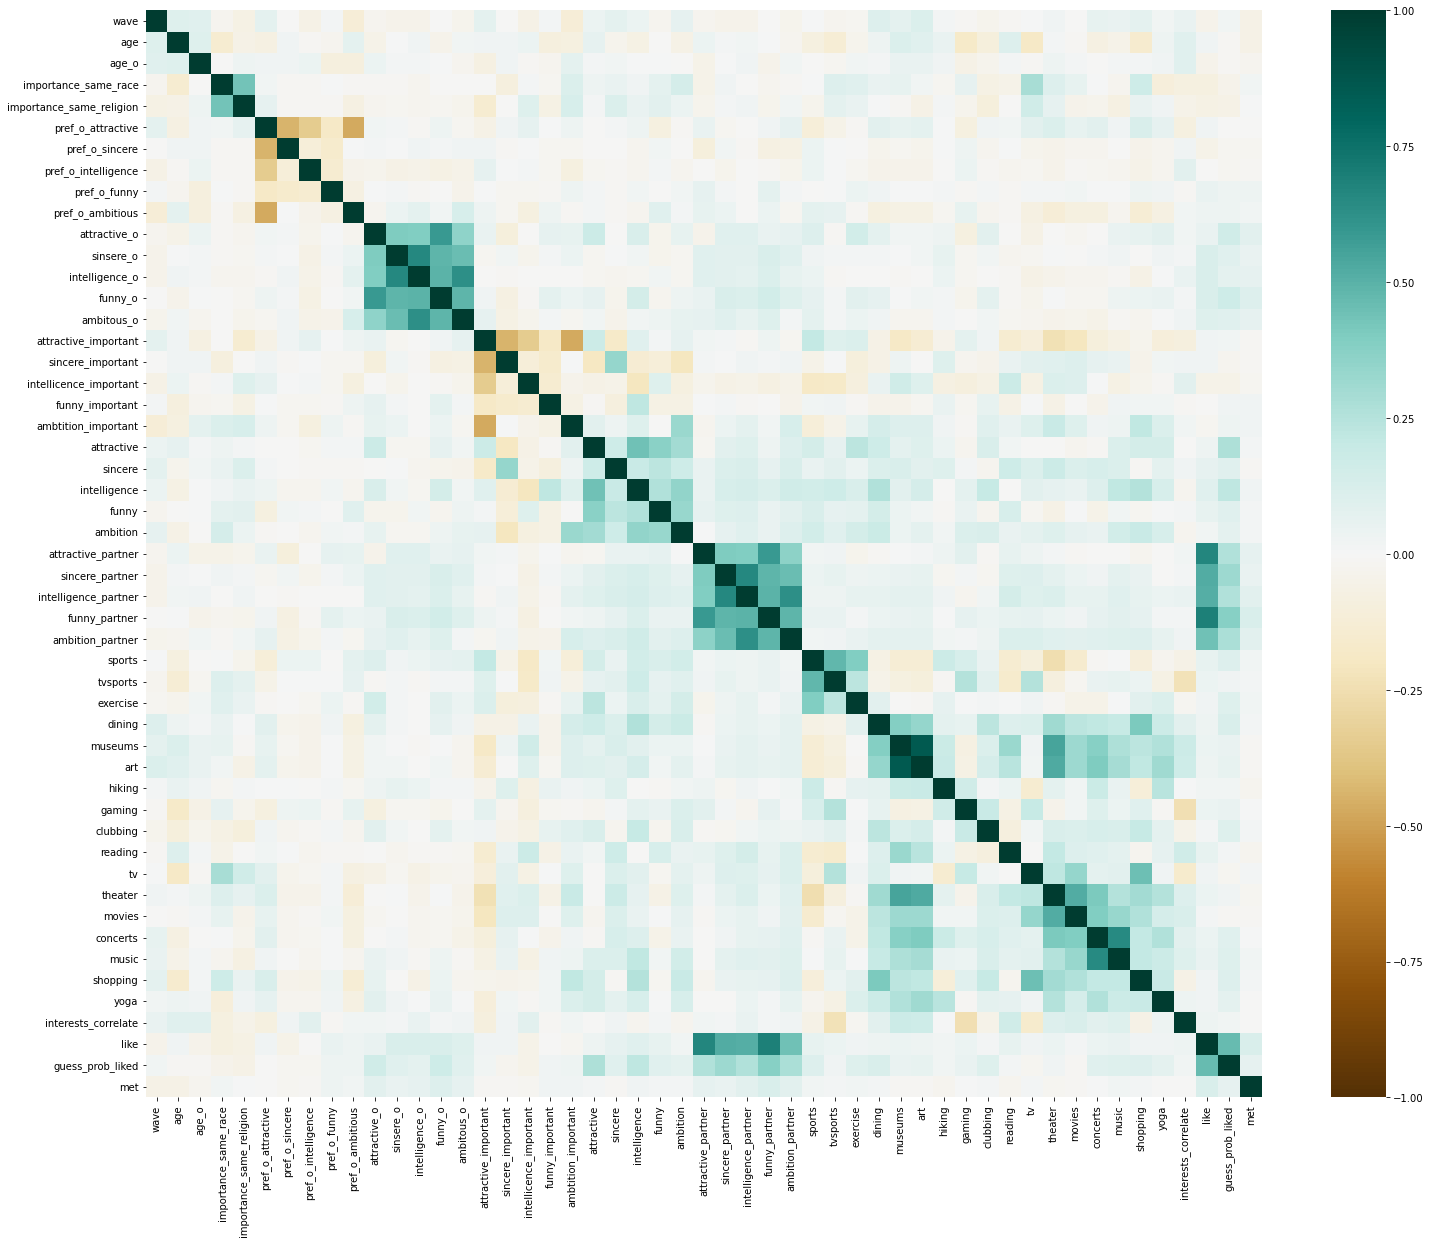

In [90]:
plt.figure(figsize=(25,20))
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap='BrBG')
plt.show()